<a href="https://colab.research.google.com/github/18K41A0256/Assignment-4/blob/main/Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.	Find the salary for the experience of 4.2 years and 5.2 years from the given dataset (salary_data) using simple linear regression. Train the model up to 10 iteration. And plot graph for error rate.

[6501848514.9766655, 6043155809.999003, 5617602511.958138, 5222794112.463662, 4856509119.926863, 4516686558.116214, 4201414368.0130796, 3908918647.6990714, 3637553669.7225385, 3385792619.766901, 3152219004.502688, 2935518680.270959, 2734472457.739533, 2547949240.9147115, 2374899661.8982987, 2214350175.5694904, 2065397580.9594848, 1927203938.4878032, 1798991854.457118, 1680040106.2700388, 1569679583.7487867, 1467289523.7175255, 1372294016.6574583, 1284158765.7758925, 1202388080.250935, 1126522085.7312999, 1056134136.393309, 990828413.9914494, 930237700.3911302, 874021311.0485768, 821863177.8085096, 773470070.23056, 728569945.4349339, 686910417.1810755, 648257335.5640789, 612393469.3360788, 579117283.437392, 548241804.857962, 519593570.4467402, 493011650.74780536, 468346744.36985356, 445460337.792628, 424223925.8820935, 404518288.7278087, 386232820.7328967, 369264908.18106705, 353519351.77795017, 338907830.9170901, 325348406.6557582, 312765060.60357976, 301087267.12907165, 290249596.4766

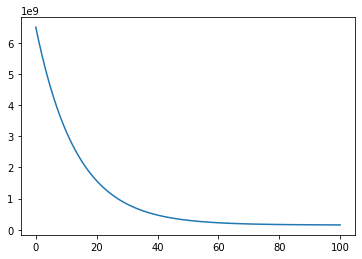

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sn=pd.read_csv("/content/Salary_Data.csv")
l=len(sn.YearsExperience)
er=[]
m1=[]
c1=[]

def compute_error(c, m):
  total_error=0
  m1.append(m)
  c1.append(c)
  for i in range(l):
    x=sn.iloc[i,0]
    y=sn.iloc[i,1]
    total_error+=((((m * x) + c) - y)**2)
  er.append(total_error/l)

def gradient_descent(c_current, m_current, learning_rate, num_iterations) :
  c_gradient=0.0
  m_gradient=0.0
  N=float(l)
  cg=[]
  mg=[]
  for i in range(l) :
    x=sn.iloc[i,0]
    y=sn.iloc[i,1]
    cg.append(((m_current * x) + c_current)-y)
    mg.append(x * (((m_current * x) + c_current)-y))
  c_gradient=(np.array(cg).sum())/N
  m_gradient=(np.array(mg).sum())/N
  c_new=c_current - (learning_rate * c_gradient)
  m_new=m_current - (learning_rate * m_gradient)
  compute_error(c_new ,m_new)
  return [c_new, m_new]

def gradient_descent_runner(starting_c, starting_m, learning_rate, num_iterations):
  c=starting_c
  m=starting_m
  for i in range(num_iterations):
     c,m=gradient_descent(c, m, learning_rate, num_iterations)

def run():
  sn=pd.read_csv("/content/Salary_Data.csv")
  l=len(sn.YearsExperience)
  initial_c=1
  initial_m=1
  learning_rate=0.001
  num_iterations=100
  compute_error(initial_c, initial_m)
  gradient_descent_runner(initial_c, initial_m, learning_rate, num_iterations)

run()
it=np.arange(0,101)
print(er)
plt.plot(it,er)

2.	Find perfect model to predict brain weight from given dataset (datasets_56097_107686_headbrain). Train the model up to 15 iterations and visualize your results.

[5693492.403888266, 4288811.31432874, 3233171.3196616126, 2439760.602746196, 1843369.53677245, 1395013.773044341, 1057895.8658463156, 804372.1912217707, 613674.8843738952, 470200.8312294317, 362226.54666548094, 280942.91761504376, 219730.18464543534, 173613.35928305882, 138853.16253884928, 112638.75159109986, 92856.8992758816, 77918.5980146934, 66628.7966039284, 58088.535830800494, 51621.42076301754, 46718.37428364326, 42996.12360872372, 40166.00350380741, 38010.51011227226, 36365.6778740121, 35107.83163294502, 34143.626274589216, 33402.55681812768, 32831.32513002998, 32389.602091047727, 32046.83872480505, 31779.865939702864, 31571.08724804336, 31407.11744092548, 31277.756720618945, 31175.217232667484, 31093.53955784596, 31028.15221675501, 30975.538882264722, 30932.986744901656, 30898.3960529749, 30870.1357931229, 30846.934193953868, 30827.795530483683, 30811.936809232073, 30798.739495227608, 30787.71263210542, 30778.464602121254, 30770.681447259776, 30764.110180553307]


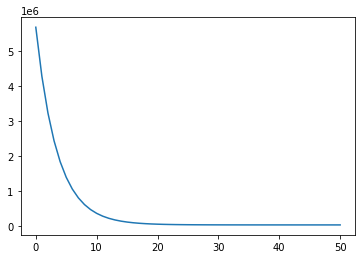

In [ ]:
bd=pd.read_csv("/content/datasets_56097_107686_headbrain.csv")
l=len(bd.Gender)
x1=[]
x2=[]
x3=[]
y=[]
for i in range(l):
  x1.append(bd.iloc[i,0])
  x2.append(bd.iloc[i,1])
  x3.append(bd.iloc[i,2])
  y.append(bd.iloc[i,3])

error=[]
w0n=[]
w1n=[]
w2n=[]
w3n=[]

def compute_error(w0, w1, w2, w3):
  total_error=[]
  w0n.append(w0)
  w1n.append(w1)
  w2n.append(w2)
  w3n.append(w3)
  for i in range(l):
    ypp=w0 + (w1 * x1[i]) + (w2 * x2[i]) + (w3 * x3[i])
    er=((ypp - y)**2)
    total_error.append(er)
  error.append(np.mean(total_error))

def gradient_descent(w0_current, w1_current, w2_current, w3_current, learningrate) :
  w0g=[]
  w1g=[]
  w2g=[]
  w3g=[]
  for i in range(l) :
    yp=w0_current + (w1_current * x1[i]) + (w2_current * x2[i]) + (w3_current * x3[i])
    w0g.append(yp-y[i])
    w1g.append(x1[i] * (yp - y[i]))
    w2g.append(x2[i] * (yp - y[i]))
    w3g.append(x3[i] * (yp - y[i]))
  w0_gradient = np.mean(w0g)
  w1_gradient = np.mean(w1g)
  w2_gradient = np.mean(w2g)
  w3_gradient = np.mean(w3g)
  w0_new=w0_current - (learningrate * w0_gradient)
  w1_new=w1_current - (learningrate * w1_gradient)
  w2_new=w2_current - (learningrate * w2_gradient)
  w3_new=w3_current - (learningrate * w3_gradient)
  compute_error(w0_new ,w1_new, w2_new, w3_new)
  return [w0_new ,w1_new, w2_new, w3_new]

def gradient_descent_runner(starting_w0, starting_w1, starting_w2, starting_w3, learning_rate, num_iterations):
  w0=starting_w0
  w1=starting_w1
  w2=starting_w2
  w3=starting_w3
  for i in range(num_iterations):
     w0,w1,w2,w3=gradient_descent(w0, w1, w2, w3, learning_rate)

def run():
  initial_w0=1
  initial_w1=1
  initial_w2=1
  initial_w3=1
  learning_rate=0.00000001
  num_iterations=50
  compute_error(initial_w0, initial_w1, initial_w2, initial_w3)
  gradient_descent_runner(initial_w0, initial_w1, initial_w2, initial_w3, learning_rate, num_iterations)

run()
it=np.arange(0,51)
print(error)
plt.plot(it,error)

3.	Recall the heart dataset from canvas and built a logistic regression model for predicting heart attach based on the given features.(age ,sex, cp, trestbps, chol, fbs, restesg ,thalach ,exang, oldpeak, slope, ca , thal,)

[array([0.7113902]), array([0.71139022]), array([0.71139024]), array([0.71139026]), array([0.71139027]), array([0.71139029]), array([0.71139031]), array([0.71139033]), array([0.71139035]), array([0.71139036]), array([0.71139038]), array([0.7113904]), array([0.71139042]), array([0.71139043]), array([0.71139045]), array([0.71139047]), array([0.71139049]), array([0.7113905]), array([0.71139052]), array([0.71139054]), array([0.71139056]), array([0.71139058]), array([0.71139059]), array([0.71139061]), array([0.71139063]), array([0.71139065]), array([0.71139066]), array([0.71139068]), array([0.7113907]), array([0.71139072]), array([0.71139073]), array([0.71139075]), array([0.71139077]), array([0.71139079]), array([0.71139081]), array([0.71139082]), array([0.71139084]), array([0.71139086]), array([0.71139088]), array([0.71139089]), array([0.71139091]), array([0.71139093]), array([0.71139095]), array([0.71139096]), array([0.71139098]), array([0.711391]), array([0.71139102]), array([0.71139104]

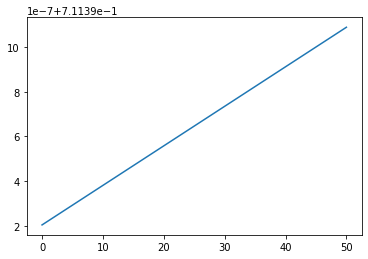

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

er=[]
w_1=[]
w_2=[]
w_3=[]
w_4=[]
w_5=[]
w_6=[]
w_7=[]
w_8=[]
w_9=[]
w_10=[]
w_11=[]
w_12=[]
w_13=[]
w_0=[]
te=[]
def compute_error(W0, W1, W2, W3, W4, W5, W6, W7, W8, W9, W10, W11, W12, W13, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13, y1):
    totalError = 0
    x1 = x1
    x2 = x2
    x3 = x3
    x4 = x4
    x5 = x5
    x6 = x6
    x7 = x7
    x8 = x8
    x9 = x9
    x10 = x10
    x11= x11
    x12 = x12
    x13 = x13
    y1 = y1
    #print(c,m)
    w_1.append(W1)
    w_2.append(W2)
    w_3.append(W3)
    w_4.append(W4)
    w_5.append(W5)
    w_6.append(W6)
    w_7.append(W7)
    w_8.append(W8)
    w_9.append(W9)
    w_10.append(W10)
    w_11.append(W11)
    w_12.append(W12)
    w_13.append(W13)
    w_0.append(W0)
    for i in range(0,len(x1)):
        a = (W0+W1*x1[i]+W2*x2[i]+W3*x3[i]+W4*x4[i]+W5*x5[i]+W6*x6[i]+W7*x7[i]+W8*x8[i]+W9*x9[i]+W10*x10[i]+W11*x11[i]+W12*x12[i]+W13*x13[i])
        a=(1/(1+(np.exp(-1 * a))))
        a = ((y1[i]*np.log2(a))+(1-y1[i])*np.log2(1-a))
        totalError+=(a)
      #te.append(totalError)
    #print(te)
    #err=(np.array(te).sum())
    er.append(-1.0*(totalError/len(x1)))
    #print(er)

def step_gradient(w0_current, w1_current, w2_current, w3_current,w4_current, w5_current, w6_current, w7_current, w8_current, w9_current, w10_current, w11_current, w12_current, w13_current, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13, y1, learningRate):
    w0_gradient = 0.0
    w1_gradient = 0.0
    w2_gradient = 0.0
    w3_gradient = 0.0
    w4_gradient = 0.0
    w5_gradient = 0.0
    w6_gradient = 0.0
    w7_gradient = 0.0
    w8_gradient = 0.0
    w9_gradient = 0.0
    w10_gradient = 0.0
    w11_gradient = 0.0
    w12_gradient = 0.0
    w13_gradient = 0.0
    N = float(len(x1))
    x1 = x1
    x2 = x2
    x3 = x3
    x4 = x4
    x5 = x5
    x6 = x6
    x7 = x7
    x8 = x8
    x9 = x9
    x10 = x10
    x11 = x11
    x12 = x12
    x13 = x13
    y1 = y1
    wg0=[]
    wg1=[]
    wg2=[]
    wg3=[]
    wg4=[]
    wg5=[]
    wg6=[]
    wg7=[]
    wg8=[]
    wg9=[]
    wg10=[]
    wg11=[]
    wg12=[]
    wg13=[]
    for i in range(0,len(x1)):
        wg0.append((w0_current+w1_current*x1[i]+w2_current*x2[i]+w3_current*x3[i]+w4_current*x4[i]+w5_current*x5[i]+w6_current*x6[i]+w7_current*x7[i]+w8_current*x8[i]+w9_current*x9[i]+w10_current*x10[i]+w11_current*x11[i]+w12_current*x12[i]+w13_current*x13[i]))
        wg1.append(x1[i] * ((w0_current+w1_current*x1[i]+w2_current*x2[i]+w3_current*x3[i]+w4_current*x4[i]+w5_current*x5[i]+w6_current*x6[i]+w7_current*x7[i]+w8_current*x8[i]+w9_current*x9[i]+w10_current*x10[i]+w11_current*x11[i]+w12_current*x12[i]+w13_current*x13[i])))
        wg2.append(x2[i] * ((w0_current+w1_current*x1[i]+w2_current*x2[i]+w3_current*x3[i]+w4_current*x4[i]+w5_current*x5[i]+w6_current*x6[i]+w7_current*x7[i]+w8_current*x8[i]+w9_current*x9[i]+w10_current*x10[i]+w11_current*x11[i]+w12_current*x12[i]+w13_current*x13[i])))
        wg3.append(x3[i] * ((w0_current+w1_current*x1[i]+w2_current*x2[i]+w3_current*x3[i]+w4_current*x4[i]+w5_current*x5[i]+w6_current*x6[i]+w7_current*x7[i]+w8_current*x8[i]+w9_current*x9[i]+w10_current*x10[i]+w11_current*x11[i]+w12_current*x12[i]+w13_current*x13[i])))
        wg4.append(x4[i] * ((w0_current+w1_current*x1[i]+w2_current*x2[i]+w3_current*x3[i]+w4_current*x4[i]+w5_current*x5[i]+w6_current*x6[i]+w7_current*x7[i]+w8_current*x8[i]+w9_current*x9[i]+w10_current*x10[i]+w11_current*x11[i]+w12_current*x12[i]+w13_current*x13[i])))
        wg5.append(x5[i] * ((w0_current+w1_current*x1[i]+w2_current*x2[i]+w3_current*x3[i]+w4_current*x4[i]+w5_current*x5[i]+w6_current*x6[i]+w7_current*x7[i]+w8_current*x8[i]+w9_current*x9[i]+w10_current*x10[i]+w11_current*x11[i]+w12_current*x12[i]+w13_current*x13[i])))
        wg6.append(x6[i] * ((w0_current+w1_current*x1[i]+w2_current*x2[i]+w3_current*x3[i]+w4_current*x4[i]+w5_current*x5[i]+w6_current*x6[i]+w7_current*x7[i]+w8_current*x8[i]+w9_current*x9[i]+w10_current*x10[i]+w11_current*x11[i]+w12_current*x12[i]+w13_current*x13[i])))
        wg7.append(x7[i] * ((w0_current+w1_current*x1[i]+w2_current*x2[i]+w3_current*x3[i]+w4_current*x4[i]+w5_current*x5[i]+w6_current*x6[i]+w7_current*x7[i]+w8_current*x8[i]+w9_current*x9[i]+w10_current*x10[i]+w11_current*x11[i]+w12_current*x12[i]+w13_current*x13[i])))
        wg8.append(x8[i] * ((w0_current+w1_current*x1[i]+w2_current*x2[i]+w3_current*x3[i]+w4_current*x4[i]+w5_current*x5[i]+w6_current*x6[i]+w7_current*x7[i]+w8_current*x8[i]+w9_current*x9[i]+w10_current*x10[i]+w11_current*x11[i]+w12_current*x12[i]+w13_current*x13[i])))
        wg9.append(x9[i] * ((w0_current+w1_current*x1[i]+w2_current*x2[i]+w3_current*x3[i]+w4_current*x4[i]+w5_current*x5[i]+w6_current*x6[i]+w7_current*x7[i]+w8_current*x8[i]+w9_current*x9[i]+w10_current*x10[i]+w11_current*x11[i]+w12_current*x12[i]+w13_current*x13[i])))
        wg10.append(x10[i] * ((w0_current+w1_current*x1[i]+w2_current*x2[i]+w3_current*x3[i]+w4_current*x4[i]+w5_current*x5[i]+w6_current*x6[i]+w7_current*x7[i]+w8_current*x8[i]+w9_current*x9[i]+w10_current*x10[i]+w11_current*x11[i]+w12_current*x12[i]+w13_current*x13[i])))
        wg11.append(x11[i] * ((w0_current+w1_current*x1[i]+w2_current*x2[i]+w3_current*x3[i]+w4_current*x4[i]+w5_current*x5[i]+w6_current*x6[i]+w7_current*x7[i]+w8_current*x8[i]+w9_current*x9[i]+w10_current*x10[i]+w11_current*x11[i]+w12_current*x12[i]+w13_current*x13[i])))
        wg12.append(x12[i] * ((w0_current+w1_current*x1[i]+w2_current*x2[i]+w3_current*x3[i]+w4_current*x4[i]+w5_current*x5[i]+w6_current*x6[i]+w7_current*x7[i]+w8_current*x8[i]+w9_current*x9[i]+w10_current*x10[i]+w11_current*x11[i]+w12_current*x12[i]+w13_current*x13[i])))
        wg13.append(x13[i] * ((w0_current+w1_current*x1[i]+w2_current*x2[i]+w3_current*x3[i]+w4_current*x4[i]+w5_current*x5[i]+w6_current*x6[i]+w7_current*x7[i]+w8_current*x8[i]+w9_current*x9[i]+w10_current*x10[i]+w11_current*x11[i]+w12_current*x12[i]+w13_current*x13[i])))
        wg0[i] = (1/(1+(np.exp(-1 * wg0[i]))))
        wg1[i] = (1/(1+(np.exp(-1 * wg1[i]))))
        wg2[i] = (1/(1+(np.exp(-1 * wg2[i]))))
        wg3[i] = (1/(1+(np.exp(-1 * wg3[i]))))
        wg4[i] = (1/(1+(np.exp(-1 * wg4[i]))))
        wg5[i] = (1/(1+(np.exp(-1 * wg5[i]))))
        wg6[i] = (1/(1+(np.exp(-1 * wg6[i]))))
        wg7[i] = (1/(1+(np.exp(-1 * wg7[i]))))
        wg8[i] = (1/(1+(np.exp(-1 * wg8[i]))))
        wg9[i] = (1/(1+(np.exp(-1 * wg9[i]))))
        wg10[i] = (1/(1+(np.exp(-1 * wg10[i]))))
        wg11[i] = (1/(1+(np.exp(-1 * wg11[i]))))
        wg12[i] = (1/(1+(np.exp(-1 * wg12[i]))))
        wg13[i] = (1/(1+(np.exp(-1 * wg13[i]))))
        
        wg0[i] =(y1[i]-wg0[i]) 
        wg1[i] =(x1[i]*(y1[i]-wg1[i])) 
        wg2[i] = (x2[i]*(y1[i]-wg2[i]))
        wg3[i] = (x3[i]*(y1[i]-wg3[i]))
        wg4[i] = (x4[i]*(y1[i]-wg4[i]))
        wg5[i] = (x5[i]*(y1[i]-wg5[i]))
        wg6[i] = (x6[i]*(y1[i]-wg6[i]))
        wg7[i] = (x7[i]*(y1[i]-wg7[i]))
        wg8[i] = (x8[i]*(y1[i]-wg8[i]))
        wg9[i] = (x9[i]*(y1[i]-wg9[i]))
        wg10[i] =(x10[i]*(y1[i]-wg10[i]))
        wg11[i] =(x11[i]*(y1[i]-wg11[i]))
        wg12[i] = (x12[i]*(y1[i]-wg12[i]))
        wg13[i] = (x13[i]*(y1[i]-wg13[i]))
        
        
        
    
    w0_gradient=(np.array(wg0).sum())/N
    w1_gradient=(np.array(wg1).sum())/N
    w2_gradient=(np.array(wg2).sum())/N
    w3_gradient=(np.array(wg3).sum())/N
    w4_gradient=(np.array(wg4).sum())/N
    w5_gradient=(np.array(wg5).sum())/N
    w6_gradient=(np.array(wg6).sum())/N
    w7_gradient=(np.array(wg7).sum())/N
    w8_gradient=(np.array(wg8).sum())/N
    w9_gradient=(np.array(wg9).sum())/N
    w10_gradient=(np.array(wg10).sum())/N
    w11_gradient=(np.array(wg11).sum())/N
    w12_gradient=(np.array(wg12).sum())/N
    w13_gradient=(np.array(wg13).sum())/N
    new_w0 = w0_current - (learningRate * w0_gradient)
    new_w1 = w1_current - (learningRate * w1_gradient)
    new_w2 = w2_current - (learningRate * w2_gradient)
    new_w3 = w3_current - (learningRate * w3_gradient)
    new_w4 = w4_current - (learningRate * w4_gradient)
    new_w5 = w5_current - (learningRate * w5_gradient)
    new_w6 = w6_current - (learningRate * w6_gradient)
    new_w7 = w7_current - (learningRate * w7_gradient)
    new_w8 = w8_current - (learningRate * w8_gradient)
    new_w9 = w9_current - (learningRate * w9_gradient)
    new_w10 = w10_current - (learningRate * w10_gradient)
    new_w11 = w11_current - (learningRate * w11_gradient)
    new_w12 = w12_current - (learningRate * w12_gradient)
    new_w13 = w13_current - (learningRate * w13_gradient)
    compute_error(new_w0,new_w1,new_w2,new_w3,new_w4,new_w5,new_w6,new_w7,new_w8,new_w9,new_w10,new_w11,new_w12,new_w13,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13, y1)
    return [new_w0,new_w1,new_w2,new_w3,new_w4,new_w5,new_w6,new_w7,new_w8,new_w9,new_w10,new_w11,new_w12,new_w13]

def gradient_descent_runner(x1, x2, x3,  x4, x5, x6, x7, x8, x9, x10, x11, x12, x13,y1, starting_w0, starting_w1, starting_w2,starting_w3, starting_w4, starting_w5, starting_w6, starting_w7, starting_w8, starting_w9, starting_w10, starting_w11, starting_w12, starting_w13, learning_rate, num_iterations):
    w0 = starting_w0
    w1 = starting_w1
    w2 = starting_w2
    w3 = starting_w3
    w4 = starting_w4
    w5 = starting_w5
    w6 = starting_w6
    w7 = starting_w7
    w8 = starting_w8
    w9 = starting_w9
    w10 = starting_w10
    w11= starting_w11
    w12 = starting_w12
    w13 = starting_w13
    for i in range(num_iterations):
        w0, w1, w2, w3,w4, w5, w6, w7, w8, w9, w10, w11, w12, w13 = step_gradient(w0, w1, w2, w3, w4, w5, w6, w7, w8, w9, w10, w11, w12, w13, x1, x2, x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13, y1, learning_rate)
      #print(c,m)
   
def run():
    data = pd.read_csv('/content/heart.csv')
    z=[]
    for x in data.columns:
        z.append(x)
    data=data[z].apply(lambda rec:(rec - rec.mean())/rec.std(), axis=0)
    sn = data
    x11=sn.iloc[:,0:1]
    x22=sn.iloc[:,1:2]
    x33=sn.iloc[:,2:3]
    x44=sn.iloc[:,3:4]
    x55=sn.iloc[:,4:5]
    x66=sn.iloc[:,5:6]
    x77=sn.iloc[:,6:7]
    x88=sn.iloc[:,7:8]
    x99=sn.iloc[:,8:9]
    x1010=sn.iloc[:,9:10]
    x1111=sn.iloc[:,10:11]
    x1212=sn.iloc[:,11:12]
    x1313=sn.iloc[:,12:13]
    y11=sn.iloc[:,3:4]
    x1=np.array(x11)
    x2=np.array(x22)
    x3=np.array(x33)
    x4=np.array(x44)
    x5=np.array(x55)
    x6=np.array(x66)
    x7=np.array(x77)
    x8=np.array(x88)
    x9=np.array(x99)
    x10=np.array(x1010)
    x11=np.array(x1111)
    x12=np.array(x1212)
    x13=np.array(x1313)
    y1=np.array(y11)
    initial_w0 = 1 
    initial_w1 = 1 
    initial_w2 = 1
    initial_w3 = 1
    initial_w4 = 1
    initial_w5 = 1
    initial_w6 = 1
    initial_w7 = 1
    initial_w8 = 1
    initial_w9 = 1
    initial_w10 = 1
    initial_w11 = 1
    initial_w12 = 1
    initial_w13 = 1
    learning_rate = 0.00000001
    num_iterations = 50
    compute_error(initial_w0, initial_w1, initial_w2, initial_w3, initial_w4, initial_w5, initial_w6, initial_w7, initial_w8, initial_w9, initial_w10, initial_w11, initial_w12, initial_w13, x1, x2, x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13, y1)
    gradient_descent_runner(x1, x2, x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13, y1, initial_w0, initial_w1, initial_w2,initial_w3,initial_w4,initial_w5,initial_w6,initial_w7,initial_w8,initial_w9,initial_w10,initial_w11,initial_w12, initial_w13,learning_rate, num_iterations)
    


run()
it=np.arange(0,51)
print(er)
plt.plot(it,er)